In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [39]:
from sklearn.preprocessing import MinMaxScaler

x=MinMaxScaler()
y=x=MinMaxScaler()

scale_X=x.fit_transform(df.drop('price',axis='columns'))

scale_Y=y.fit_transform(df['price'].values.reshape(df.shape[0],1))


In [40]:
scale_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [41]:
scale_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [42]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    n=X.shape[1]
    
    w=np.ones(shape=(n))
    b=0
    
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scale_X,scale_Y.reshape(scale_Y.shape[0],),500)
w, b, cost
    
    

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

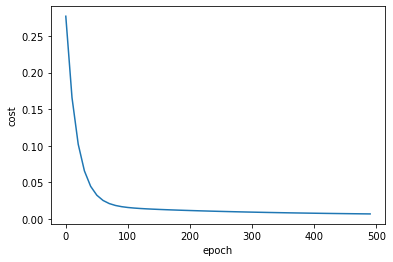

In [43]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [45]:
def predict(area,bedrooms,w,b):
    scaled_X = x.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return y.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

1797.9111976304664

In [52]:
import random
def stochastic_gd(X,y_true,epochs,learning_rate=0.01):
    no_features=X.shape[1]
    
    w=np.ones(shape=(no_features))
    b=0
    
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        index=random.randint(0,total_samples-1)
        sample_x=X[index]
        sample_y=y_true[index]
        
        y_predicted=np.dot(w,sample_x.T)+b
        
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
        
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gd(scale_X,scale_Y.reshape(scale_Y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71179595, 0.67862371]), -0.23313485854556237, 0.0020756767153708023)

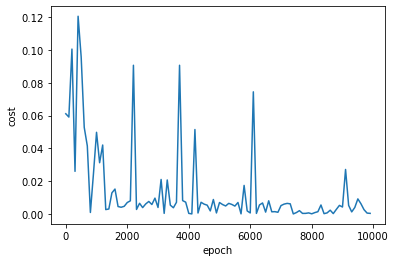

In [53]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [84]:
def mini_batch(X,y_true,epochs,learning_rate=0.01):
    no_features=X.shape[1]
    
    w=np.ones(shape=(no_features))
    b=0
    
    total_samples=X.shape[0]

    
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        sample_x=X[np.random.choice(total_samples-1,5)]
        sample_y=y_true[np.random.choice(total_samples-1,5)]
        
        y_predicted=np.dot(w,sample_x.T)+b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum((sample_y-y_predicted))
        
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        
        cost=np.mean(np.square(sample_y-y_predicted))
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
        
    return w,b,cost,cost_list,epoch_list
        
w_mb,b_mb,cost_mb,cost,epochs=mini_batch(scale_X,scale_Y.reshape(scale_Y.shape[0],),5)

w_mb,b_mb,cost

(array([0.99359674, 0.99234335]), -0.010748238518186707, [0.4318955070144791])

In [86]:
predict(2500,4,w_mb,b_mb)

2454.9601309601003